In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.font_manager as fm

In [2]:
df = pd.read_csv('C:\\Users\\xorud\\Desktop\\동아리\\train.csv')

데이터를 불러옴 , 데이터에 대한 정보를 확인한다 .
확인하는 이유 : 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
print(df.describe())
print(df.describe(include = object))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                           Name   Sex  Ticket    Cabin Embarked
count            

describe는 데이터의 통계량을 보여주는 코드
여기서 확인해야 할것 count에서 Age가 891이 아니라 714 인 점
cabin이 204인 점 
Embarked가 889 인 점 
null 값이 있다는 것을 알고 시작 

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

좀 더 명확하게 알기 위해서 isnull().sum()을 이용하여 null값이 있는지 확인을 해본다 .
Age Cabin Embarked 확인 

# 시각화

In [10]:
age = df['Age']

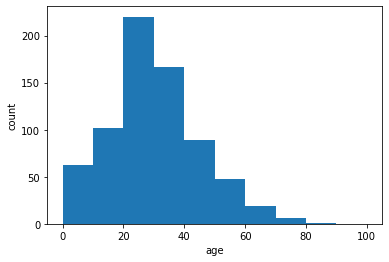

In [13]:
plt.hist(age, bins = [0, 10, 20, 30 , 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('age')
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='Cabin', ylabel='count'>

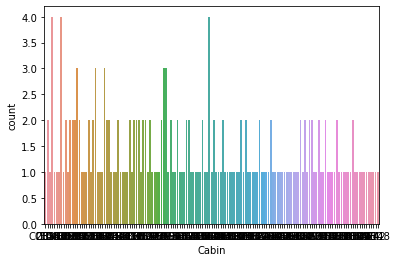

In [8]:
sns.countplot(x = 'Cabin',data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

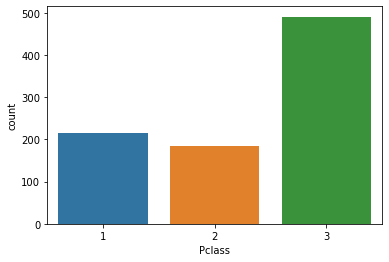

In [9]:
sns.countplot(x = 'Pclass',data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

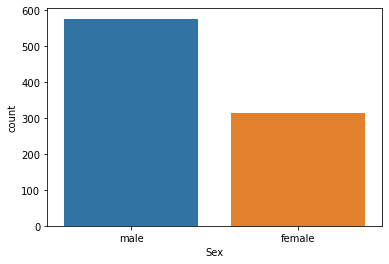

In [10]:
sns.countplot(x = 'Sex',data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

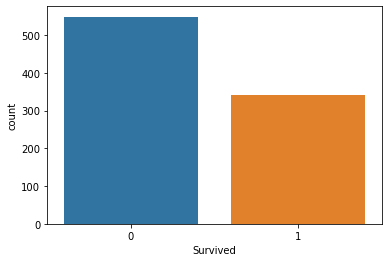

In [11]:
sns.countplot(x = 'Survived',data = df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

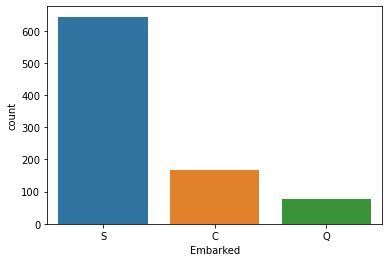

In [12]:
sns.countplot(x = 'Embarked',data = df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

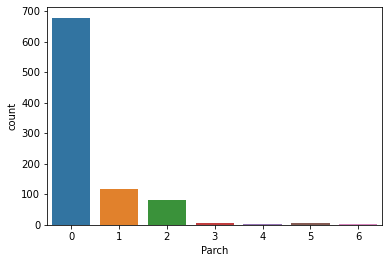

In [13]:
sns.countplot(x = 'Parch',data = df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

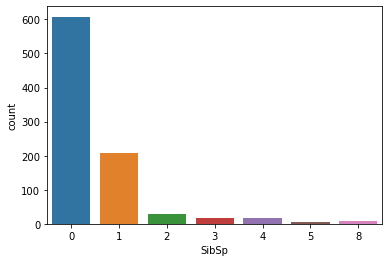

In [14]:
sns.countplot(x = 'SibSp',data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d9df88f430>,
 'caps': [<matplotlib.lines.Line2D at 0x2d9df88fa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d9df88f100>],
 'medians': [<matplotlib.lines.Line2D at 0x2d9df89d1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d9df89d580>],
 'means': []}

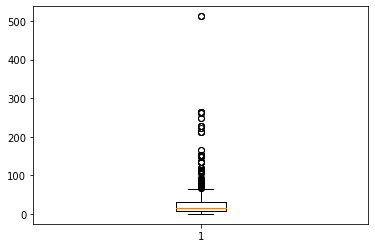

In [14]:
plt.boxplot(x = 'Fare', data = df)

# Cabin 결측치를 처리 

In [16]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Cabin의 결츨치에 어떤 값을 넣을까 고민하기 위해 중복이 되지 않는 값을 보기 위해 unique()를 사용

In [17]:
df[df['Age'].isnull() &df['Cabin'].isnull()]  # 177개중 158개가 cabin이 null 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Age와 Cabin이 중복적으로 결측치가 존재하는지 확인 

Cabin은 객실인데 객실은 돈,ticket,pclass 에 대해서 확인을 하였음 ticket은 너무 복잡했고 돈은 관련이 없었음 그래서 PCLASS 별로 확인

In [18]:
df1 = df[['Pclass','Cabin']]

In [19]:
df1[df1['Pclass'] == 3].isnull().sum()   #1은 nan 40 2 nan 168  3  479

Pclass      0
Cabin     479
dtype: int64

Pclass 별로 Cabin의 결측치를 확인 

In [20]:
df1[df1['Pclass'] ==1]['Cabin'].unique() # 2: D56', 'F33', 'E101', 'F2', 'F4', 'D', 'E77
                                         # 3 : 'G6', 'F G73', 'F E69', 'E10', 'F G63', 'E121', 'F38'

array(['C85', 'C123', 'E46', 'C103', 'A6', 'C23 C25 C27', nan, 'B78',
       'D33', 'B30', 'C52', 'B28', 'C83', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'C62 C64', 'E24', 'C90',
       'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'D11', 'B3', 'D6',
       'B8

pclass 별로 Cabin의 값을 확인하였음 1은 정말 많이 나와서 2,3을 확인 하였는데 
중복이 되는게 없었음 

In [21]:
for i in ['D56', 'F33', 'E101', 'F2', 'F4', 'D', 'E77']:
    df2 = df1[df1['Cabin']== i]
    print(df2)     # 2와 3이 1이랑은 중복이 없다 .

    Pclass Cabin
21       2   D56
     Pclass Cabin
66        2   F33
345       2   F33
516       2   F33
     Pclass Cabin
123       2  E101
303       2  E101
717       2  E101
     Pclass Cabin
148       2    F2
193       2    F2
340       2    F2
     Pclass Cabin
183       2    F4
618       2    F4
     Pclass Cabin
292       2     D
327       2     D
473       2     D
     Pclass Cabin
772       2   E77


혹시나 눈대중으로 해서 확인이 되지 않았을까 싶어서 반복문을 이용하여 중복이 되는지 안 되는지 확인 
결과 : 중복 X

이번에는 Age의 결측치를 채우는 과정 나이를 기준을 정할 수 있는게 무엇일까 싶어서 영어 앞에 붙는 MR,MRS,Miss 를 별로 나누기로 했음

# Age 결측치 처리

In [22]:
Mrage = df[df['Name'].str.contains('Mr',case = False)] 

In [23]:
# Mr라고 쓰여져 있는 값들을 불러왔음 

In [24]:
# 문제 발생  Mr만 포함한 값들을 불러올려고 했는데 Mrs 값까지 불러오게 됨

In [25]:
mrsaind = Mrage[Mrage['Name'].str.contains('Mrs')].index
Mrage.drop(mrsaind,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
# Mrs라는 값을 포함한 값의 index를 따로 뽑아서 Mr의 값에서 빼 주었음

In [27]:
Mrage['Sex'].unique()

array(['male'], dtype=object)

In [28]:
# 그래서 오로지 남자 밖에 안 남게 되었고 

In [29]:
Mrage['Age'].isnull().sum()

119

In [30]:
#이름에 MR인 사람들에서 결측치가 있는 값을 확인

In [31]:
# Miss 가 적힌 값들을 확인

In [32]:
Missage = df[df['Name'].str.contains('Miss')]

In [33]:
Missage.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             36
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          135
Embarked         1
dtype: int64

In [34]:
Mrsage = df[df['Name'].str.contains('Mrs')]

In [35]:
Mrsage['Age'].isnull().sum()

17

In [36]:
from scipy.stats import mode

In [37]:
Mrsage['Age'].unique()

array([38., 35., 27., 14., 55., 31., nan, 40., 18., 49., 29., 33., 34.,
       47., 24., 22., 45., 32., 44., 41., 50., 58., 19., 17., 26., 36.,
       60., 28., 42., 23., 63., 25., 54., 48., 39., 53., 52., 43., 30.,
       51., 57., 62., 15., 56.])

In [38]:
# 문제 발생 총 177개 중 ( 17+119+36)  = 172 (?) : 5개 손실  == MR Miss MRS 제외한 값들이 존재하구나 

In [39]:
other =ageother = df[df['Name'].str.contains('Mrs')| df['Name'].str.contains('Mr')|df['Name'].str.contains('Miss') == False]

In [40]:
# Mr값과 Mrs,Miss 값을 제외한 값을 확인 

In [41]:
other

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.00,0,0,PC 17601,27.7208,NaN,C
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
848,849,0,2,"Harper, Rev. John",male,28.00,0,1,248727,33.0000,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S


In [42]:
# 이름에 master가 있는게 있고 호칭을 나타내는 말이 없는 사람도 존재

In [43]:
master = df[df['Name'].str.contains('Master')]
master.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             4
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          33
Embarked        0
dtype: int64

In [44]:
master['Age'].unique()

array([ 2.  ,  7.  , 11.  ,  4.  ,   nan,  0.83, 12.  ,  1.  ,  9.  ,
        3.  ,  0.92,  8.  ,  6.  ,  0.67,  0.42, 10.  ])

In [45]:
# master라는 이름을 가진 사람은 주로 아이들(후손)에게 쓰여진다는 것, 결측치는 4개라는 점 확인

In [46]:
ageother = df[df['Name'].str.contains('Mrs')| df['Name'].str.contains('Mr')|df['Name'].str.contains('Miss')|df['Name'].str.contains('Master') == False]

In [47]:
# 앞에 있던 모든값들을 제외한 값을 뽑아냄 

In [48]:
ageother.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             1
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          14
Embarked        0
dtype: int64

In [49]:
ageother['Age'].unique()

array([40., 42., 51., 44., 54., 24., 23., 28., 52., 45., 57., 32., 56.,
       50., 60., 70., 33., nan, 49., 38., 27.])

In [50]:
# 나이가 어느정도 있는 일꾼들이 많다는 것을 알게 됨

In [51]:
np.mean(ageother['Age'])

42.65217391304348

In [52]:
# 일꾼들의 나이는 다양하다 그래서 평균값을 넣어 결측치를 대체 할 것이다 .

In [53]:
mode(master['Age'])

ModeResult(mode=array([1.]), count=array([5]))

In [54]:
# master 최빈값은 1이다 1의 값이 5개 있다는 것 영유아도 있었고 최대9실인 경우도 있어서 1살로 지정 

In [55]:
mode(Mrage['Age']) # 최빈값

ModeResult(mode=array([19.]), count=array([18]))

In [56]:
# Mr의 Age는 최빈값으로 대체

In [57]:
mode(Mrsage['Age'])

ModeResult(mode=array([24.]), count=array([9]))

In [58]:
# Mrsage 성별 최빈값으로 대체

In [59]:
mode(Missage['Age'])

ModeResult(mode=array([18.]), count=array([10]))

In [60]:
# Missage나이 최빈값으로 대체

In [61]:
# Cabin 값 변경하기 
data =df.copy()

In [62]:
#filㅣna는 결측치에 값을 대체하는 코드 아까 앞에서 결측치를 대체하겠다는 값들을 모두 넣어준다.

In [63]:
ageother['Age'] = ageother['Age'].fillna(42)

C:\Users\kio02\AppData\Local\Temp/ipykernel_1196/2781805761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageother['Age'] = ageother['Age'].fillna(42)


In [64]:
master['Age'] = master['Age'].fillna(1)

C:\Users\kio02\AppData\Local\Temp/ipykernel_1196/1298966967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master['Age'] = master['Age'].fillna(1)


In [65]:
Mrage['Age'] = Mrage['Age'].fillna(19)

C:\Users\kio02\AppData\Local\Temp/ipykernel_1196/2520182207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mrage['Age'] = Mrage['Age'].fillna(19)


In [66]:
Mrsage['Age'] = Mrsage['Age'].fillna(24)
Missage['Age'] = Missage['Age'].fillna(18)

C:\Users\kio02\AppData\Local\Temp/ipykernel_1196/116471909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mrsage['Age'] = Mrsage['Age'].fillna(24)
C:\Users\kio02\AppData\Local\Temp/ipykernel_1196/116471909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Missage['Age'] = Missage['Age'].fillna(18)


In [67]:
print(Mrsage['Age'].isnull().sum())
print(Missage['Age'].isnull().sum())
print(ageother['Age'].isnull().sum())
print(master['Age'].isnull().sum())
print(Mrage['Age'].isnull().sum())

0
0
0
0
0


In [68]:
#혹사나 값에 null 값이 있는지 확인

In [69]:
dat1 = pd.concat([Mrage,Mrsage,Missage,ageother,master],axis = 0)

In [70]:
# 그리고 데이터를 합쳐준다. axis =0  행으로 연결 axis = 1 열로 연결 

In [71]:
dat1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          689
Embarked         2
dtype: int64

In [72]:
data= dat1.sort_index(ascending = True )

In [73]:
#데이터를 index 별로 정리

In [74]:
mode(data['PassengerId'])

ModeResult(mode=array([200], dtype=int64), count=array([2]))

In [75]:
#Passid가 겹치는게 있네

In [76]:
data[data.duplicated(['PassengerId'],keep = False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0,NaN,S
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0,NaN,S
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0,NaN,S


In [77]:
data = data.drop_duplicates(['PassengerId'] ,keep = 'first') # 겹치는거 제외

In [78]:
# 데이터는 891 개 존재 

In [79]:
# cabin 값을 pclass 값으로 변경 ( 데이터 변수를 생성을 함)

In [80]:
pclass = list(data['Pclass'])
cabin = []
for i in pclass:
    cabin.append(i)

In [81]:
data['cabin'] = cabin

In [82]:
# pclass랑 cabin의 값이 다른지 확인

In [83]:
data[data['Pclass'] != data['cabin']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  cabin        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


# Embarked 처리  

In [85]:
data['Embarked'].value_counts() # 얼마나 분포 되었있는지 확인 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [86]:
data['Embarked'] = data['Embarked'].fillna('S')  # S가 월등히 많아서 결측값을 S로 대체를 함 

In [87]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
cabin            0
dtype: int64

In [88]:
data = data.drop(['Cabin'],axis = 1) # Cabin값은 이제 필요가 없으니 삭제

In [89]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
cabin          0
dtype: int64

# 데이터 완성

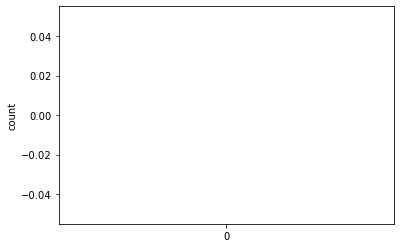

In [90]:
plt.figure()
sns.countplot()
plt.show()

In [91]:
titanic = data.copy()

In [92]:
# 상관분석을 돌리기 위해 명목형 변수를 더미변수를 만든다 .
# 더미변수 ? 

In [93]:
titanic_embark = pd.get_dummies(titanic['Embarked'])

In [94]:
titanic = titanic.join(titanic_embark)

In [95]:
titanic['Sex'] = titanic['Sex'].apply(lambda x : x.replace('male','1'))
titanic['Sex'] = titanic['Sex'].apply(lambda x : x.replace('fe1','0'))
titanic['Sex'] = list(map(int,titanic['Sex']))

In [96]:
titanic['Sex'].unique()

array([1, 0], dtype=int64)

In [97]:
titanic['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [98]:
titanic.drop(['Embarked'],axis = 1 , inplace =True) # titanic 변수에 Embarked 값은 필요가 없으니 삭제

In [99]:
titanic = titanic.drop(['Ticket','Name'],axis = 1) # ticket Name은 상관분석에 못 넣으니 삭제

In [100]:
titanic_corr = titanic.corr() # 상관분석 
# 상관분석 하는 이유 ?

<AxesSubplot:>

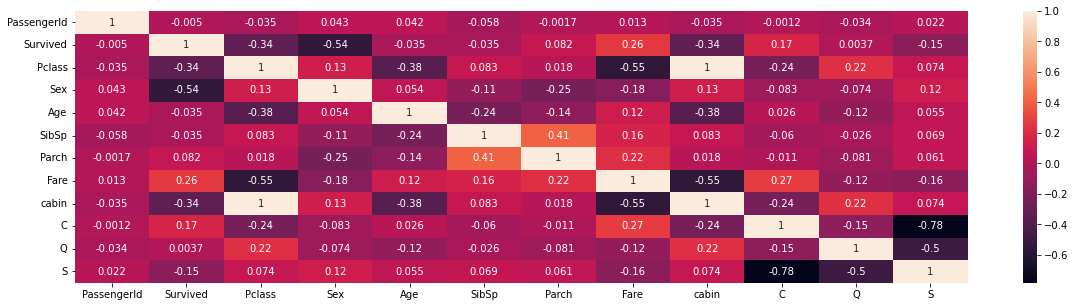

In [101]:
plt.rcParams['figure.figsize'] = [20, 5]
sns.heatmap(titanic_corr,annot = True)   #  c랑 s 가 -0.79 관련이 어느정도는 있네(?) pclass,cabin은 상황을 보면서 지우는 식으로 한다.

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score

In [103]:
X = titanic.drop(['PassengerId','Survived','cabin'],axis = 1 )    # X인 변수와 Y 값을 분리를 해준다 .

Y= titanic['Survived']

In [104]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2 ,shuffle = True) # 666 , 167 # 왜 4개로 나누는 걸까?

In [105]:
Logistic_fit = Logistic = LogisticRegression()
Decision = tree.DecisionTreeClassifier()  

# Logistic regression : 로지스틱 회귀분석 이란 
# Decision tree : 의사결정나무 

In [106]:
Logistic.fit(x_train,y_train)
Decision.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

# logistic regression 

In [107]:
Logistic_pred = Logistic.predict(x_test)
print( 'Accuracy: %.2f'% accuracy_score(y_test,Logistic_pred))

Accuracy: 0.83


In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [109]:
lr_pred_probability = Logistic.predict_proba(x_test)[:,1]

In [110]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_pred_probability )

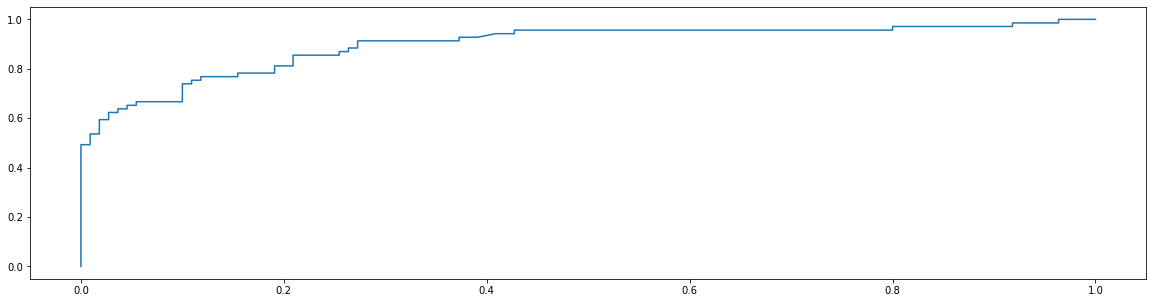

In [111]:
plt.plot(fpr_lr, tpr_lr, label='ROC')

In [112]:
confusion_matrix(y_true = y_test,y_pred = Logistic_pred ) # confusion matrix 혼동행령

array([[96, 14],
       [16, 53]], dtype=int64)

In [113]:
# precision 정밀도 (진짜라고 예측한것중 진짜 ) TP/(TP + FP)
# recall ,sensitivity ,Tpr(True postive rate) 정확히 맞춘 값중 true 값 (TP + FN)
#specificity 특이도 1- FPR  실제 False 인값을 False로 예측한 값
# FPR 실제 False 인도 True 로 예측한 값
# TPR 이 높아지면 FPR 이 높아짐 비레적으로 잘 만든게 Roc Curve 그림 면적이 AUC
# thresholds : 임계값 임계값보다 낮은면 False 높은면 True 

In [114]:
roc_auc = roc_auc_score(y_test, Logistic_pred)
print("AUC : %.3f" % roc_auc)

AUC : 0.820


In [121]:
print("훈련 세트 정확도: {:.3f}".format(Logistic.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(Logistic.score(x_test, y_test)))

훈련 세트 정확도: 0.794
테스트 세트 정확도: 0.832


# DecisionTree

In [115]:
`Decision_pred = Decision.predict(x_test)
print('Accuracy: %.2f'% accuracy_score(y_test,Decision_pred))

Accuracy: 0.75


In [116]:
dt_pred_probability = Decision.predict_proba(x_test)[:,1]
confusion_matrix(y_true = y_test,y_pred = Decision_pred )

array([[82, 28],
       [16, 53]], dtype=int64)

In [117]:
roc_auc = roc_auc_score(y_test, Decision_pred)
print("AUC : %.3f" % roc_auc)

AUC : 0.757


In [120]:
print("훈련 세트 정확도: {:.3f}".format(Decision.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(Decision.score(x_test, y_test)))

훈련 세트 정확도: 0.980
테스트 세트 정확도: 0.754


In [122]:
from sklearn.ensemble  import RandomForestClassifier

# RandomForest

In [123]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [124]:
 rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [125]:
rf_pred = rf.predict(x_test)
print('Accuracy: %2f' % accuracy_score(y_test,rf_pred))

Accuracy: 0.832402


In [126]:
roc_auc = roc_auc_score(y_test,rf_pred)
print('Auc %2f' % roc_auc)

Auc 0.825823


In [127]:
print("훈련 세트 정확도: {:.3f}".format(rf.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rf.score(x_test, y_test)))

훈련 세트 정확도: 0.980
테스트 세트 정확도: 0.832


# 추가

 # K-Fold

In [128]:
from sklearn.model_selection import KFold, cross_val_score

In [129]:
X_array = np.array(X)
Y_array = np.array(Y)

In [130]:
kfold = KFold(n_splits=7, shuffle=True)
cv_accuracy = []
n_iter = 0
for train_index, test_index in kfold.split(X_array):  # X 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    
    Logistic.fit(x_train, y_train)
    pred = Logistic.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


#1 교차 검증 정확도 : 0.8047,  학습 데이터 크기 : 763,  검증 데이터 크기 : 128
#1 검증 세트 인덱스 : [  0  11  18  29  31  46  81  82 120 122 129 131 132 140 149 155 158 170
 171 180 181 187 196 199 202 220 223 228 233 236 241 243 246 249 250 252
 265 267 275 279 284 289 292 316 321 322 328 331 332 333 339 350 352 373
 377 378 380 391 392 399 400 411 416 427 433 440 447 456 457 469 478 483
 491 504 506 518 519 530 531 548 551 555 557 569 574 586 601 606 612 621
 623 636 637 639 641 643 659 665 670 680 688 704 707 727 736 747 754 768
 769 780 787 788 796 797 798 801 805 813 817 824 832 833 839 849 867 868
 882 884]

#2 교차 검증 정확도 : 0.7969,  학습 데이터 크기 : 763,  검증 데이터 크기 : 128
#2 검증 세트 인덱스 : [  8  13  24  36  43  45  54  60  62  65  71  75  76 110 127 133 138 165
 167 172 185 195 203 204 205 208 225 231 237 240 260 262 270 274 277 278
 285 293 295 296 299 300 309 311 313 318 329 334 344 345 347 349 388 406
 419 424 426 436 439 451 453 454 459 460 461 470 474 479 480 484 499 503
 510 532 533 534 535 537 556 561 563 60

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
kfold = KFold(n_splits=7, shuffle=True)
cv_accuracy = []
n_iter = 0
for train_index, test_index in kfold.split(X_array):  # X 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    
    Decision.fit(x_train, y_train)
    pred = Decision.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.7734,  학습 데이터 크기 : 763,  검증 데이터 크기 : 128
#1 검증 세트 인덱스 : [  5  17  18  46  48  57  59  60  69  80  82  85  86  88  98 109 114 121
 127 128 131 133 150 157 159 160 163 166 171 175 176 179 193 195 197 200
 201 208 240 246 261 268 270 285 312 313 321 327 328 332 334 348 349 354
 358 359 360 369 370 398 401 415 423 433 440 441 483 491 493 495 502 509
 513 519 523 524 534 540 560 561 562 564 578 588 593 601 612 621 638 649
 653 662 667 671 681 686 710 723 727 728 730 731 734 745 747 751 754 755
 758 759 760 762 779 782 786 795 809 822 828 830 834 835 837 869 875 880
 885 889]

#2 교차 검증 정확도 : 0.8125,  학습 데이터 크기 : 763,  검증 데이터 크기 : 128
#2 검증 세트 인덱스 : [  3  13  19  24  28  31  35  42  52  63  66  68  84  93 100 106 116 123
 126 135 136 137 174 186 187 190 196 199 207 210 214 217 224 226 230 238
 243 244 252 258 264 266 292 293 294 299 303 306 309 317 319 322 324 366
 367 368 376 385 387 400 406 407 411 420 421 424 429 436 439 451 454 472
 482 487 499 500 507 508 511 521 525 54

In [132]:
kfold = KFold(n_splits=7, shuffle=True)
cv_accuracy = []
n_iter = 0
for train_index, test_index in kfold.split(X_array):  # X 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.7734,  학습 데이터 크기 : 763,  검증 데이터 크기 : 128
#1 검증 세트 인덱스 : [  0   7   8  29  30  33  36  40  44  46  54  56  66  75  77  88 108 120
 131 132 140 154 173 179 180 185 189 209 210 219 227 244 249 261 264 271
 272 278 283 289 295 297 301 312 319 340 345 356 358 363 365 371 381 394
 395 402 404 414 416 418 422 437 442 449 450 451 456 461 470 477 480 486
 498 508 512 516 521 525 526 527 531 533 563 568 569 578 591 594 595 599
 603 615 622 639 642 643 645 646 649 654 667 696 698 700 721 722 728 729
 734 737 739 742 748 758 760 773 784 793 795 800 806 807 808 838 842 855
 877 885]

#2 교차 검증 정확도 : 0.8281,  학습 데이터 크기 : 763,  검증 데이터 크기 : 128
#2 검증 세트 인덱스 : [  3  13  15  16  18  23  24  26  43  52  62  63  70  73  74  83  94 104
 112 113 121 128 137 138 142 158 171 183 187 203 218 228 231 234 237 238
 242 255 268 277 285 291 326 331 332 336 341 349 350 351 355 369 379 385
 386 396 408 417 435 441 446 452 453 460 464 466 474 475 492 493 495 501
 506 514 518 520 523 534 535 540 542 54